# Data Preparation - 
* Study the data and different columns.
* Filter the reviews based on overall rating.
* Create train and test data using the filtered data.

In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading reviews from json file
with open('data/Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


### Meaning of each column
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* vote - helpful votes of the review
* style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)
* image - images that users post after they have received the product

In [5]:
reviews_df.shape

(497577, 12)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


We will not be using the verified, reviewerTime, reviewerID, vote, style, image, unixReviewTime columns as they are not relevant for the further training process.

In [15]:
reviews_df = reviews_df.drop(['verified', 'reviewTime', 'reviewerID', 'vote', 'style', 'image', 'unixReviewTime', 'reviewerName'], axis = 1)

In [17]:
# Checking for null values
reviews_df.isna().sum()

overall         0
asin            0
reviewText    158
summary       109
dtype: int64

In [19]:
reviews_df = reviews_df.dropna()

In [20]:
reviews_df.shape

(497316, 4)

<Axes: xlabel='overall', ylabel='count'>

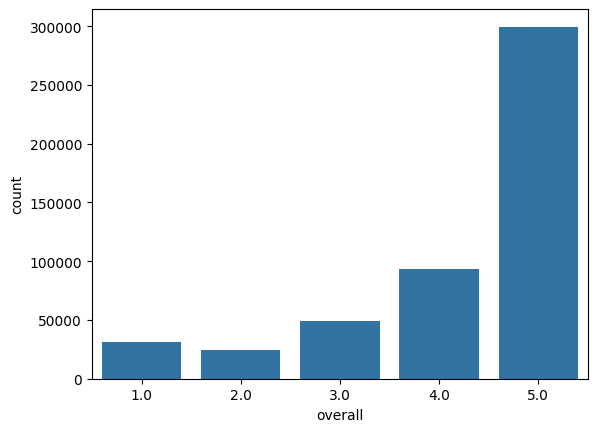

In [21]:
sns.countplot(data = reviews_df, x='overall')

In [22]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

There are 17408 different products

In [23]:
reviews_df['overall'].value_counts(dropna=False)

overall
5.0    299541
4.0     93636
3.0     49138
1.0     30872
2.0     24129
Name: count, dtype: int64

All the reviews with overall rating '1' are considered as negative, and all the reviews with overall rating '5' are considered as positive. Further analysis can be done by considering neutral reviews as well. But for this task, we will only select reviews with rating '1' or '5'

In [25]:
one = reviews_df[reviews_df['overall']==1.0].sample(n=2000)
# two = reviews_df[reviews_df['overall']==2.0].sample(n=500)
# three = reviews_df[reviews_df['overall']==3.0].sample(n=500)
# four = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five = reviews_df[reviews_df['overall']==5.0].sample(n=2000)

In [27]:
reviews = pd.concat([one, five], axis=0)
# reviews = pd.concat([one, two, three, four, five], axis=0)

In [28]:
reviews.head()

,overall,asin,reviewText,summary
133257,1.0,B00149MEVY,Terrible game compared to Silent Hill as a who...,Terrible game compared to Silent Hill as a whole
16410,1.0,B00004TTHT,"Stuttering graphics, severe slowing during act...",..........Another Sierra flop.
220540,1.0,B003ZULWQI,"I just bought this and RAGE, both for like 6 b...",Terrible OLD graphics - waste of 7 bucks
297998,1.0,B00C27SCC2,Nothing about this game says PS4. The graphics...,WHAT A DISAPPOINTMENT
303256,1.0,B00CMQTVUA,Seems like they rushed this system I don't und...,Horrible ps4 better


In [29]:
reviews.to_csv("data/small_balanced_corpus.csv", index=False)

In [30]:
# We can also create a bigger corpus to get better results. But we will stick to the smaller corpus for now.

# sample_100K_revs = reviews_df.groupby('overall', group_keys=False).apply(lambda x: x.sample(frac=0.201))
# sample_100K_revs.to_csv("data/big_balanced_corpus.csv", index=False)